# LBA | CS 156, Fall 2019
### Berfin Karaman

I chose to photograph the building across my living room because this is the view I have seen the most this semester and I thought it might be interesting to have a timelapse of the place to capture a memo from my Berlin semester. Also it would be interesting to experiment with the reconstruction of a place that is so familar to me. I feel like using machine learning to reconstruct a place that is "home" for me will have a deeper meaning because it will show how my academic life interacts with my daily life. I think this will be a nice example of machine and human interaction and how can it be used to create a different perspective on how we percieve life. I will re-member this place years later in a little bit of corrupted way just like the blurry re-constructed pictures from PCA.

In [1]:
#importing the libraries
import glob
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.decomposition import PCA
from PIL import Image

In [2]:
#importing the dataset 
filelist = glob.glob("/Users/berfinkaraman/Desktop/Lba/*.jpg")

#creating an array with each image in the jersey file
pics = np.array([np.array(Image.open(fname)) for fname in filelist])
pics.shape

(23, 3120, 4160, 3)

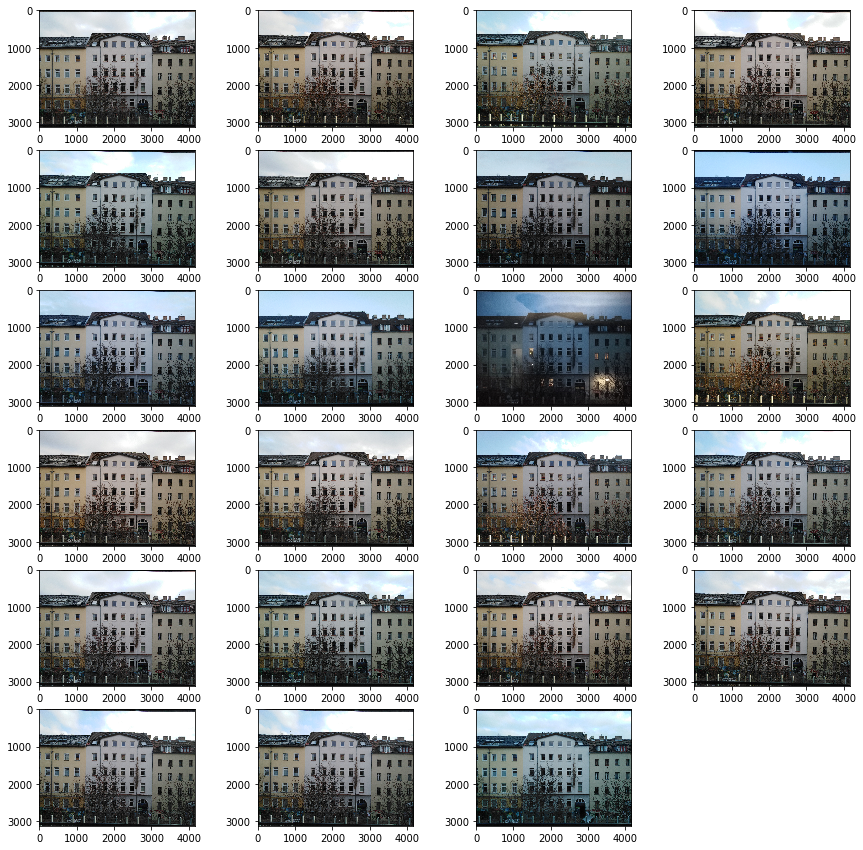

In [3]:
#Plotting the image library before downsizing
fig=plt.figure(figsize=(15, 15))

for i in range(1, 24):
    fig.add_subplot(6, 4, i)
    plt.imshow(pics[i-1].reshape(3120, 4160, 3))
plt.show()

#### Task 1: Processes all photos down 

In [5]:
#The original size of each image is 4160 × 3120 since I took them with my phone camera.
#Thus I need to processes all photos down to a size not exceeding 512 pixels in either width or height as it was
#given by the assignment description 

#First, I will calculate the ratio between the width and the height to find the size of the dimesions
#that I would like to size down my images to 
ratio = 3120/4160
#calculating the appropriate length when height is 512
length= int(ratio*512)

smallpics=[]

for i in range(len(pics)):
    smallpics.append(resize(pics[i], (512, length)).flatten())



/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


#### Task 2: 2D represendation by using PCA

In [6]:
#Initialising the PCS with 2 as principal components
pca= PCA(n_components=2)

#fitting to PCA model and tranforming the original features
pcapics = pca.fit_transform(smallpics)


#### Task 3: Inspect the 2D locations of each photo

Text(0.5, 1.0, '2D locations of each photo')

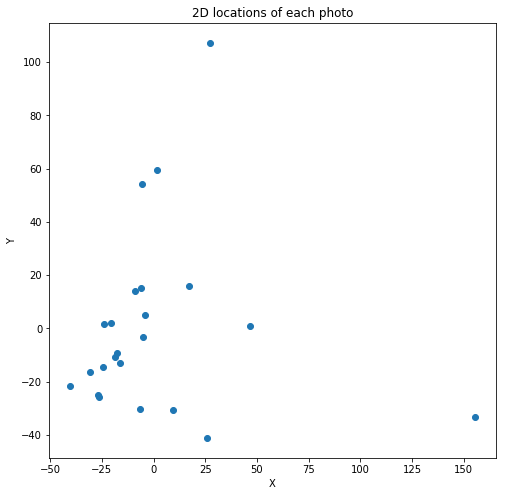

In [7]:
#Plotting x and y of the pca

plt.figure(figsize=(8, 8))
plt.scatter(pcapics[:,0], pcapics[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D locations of each photo')


#### Task 4: The reconstruction from each low-dimensional representation

In [8]:
# reconstruct data
reconstructpics = pca.inverse_transform(pcapics)

# check reconstructed data shape
print(reconstructpics.shape)

(23, 589824)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

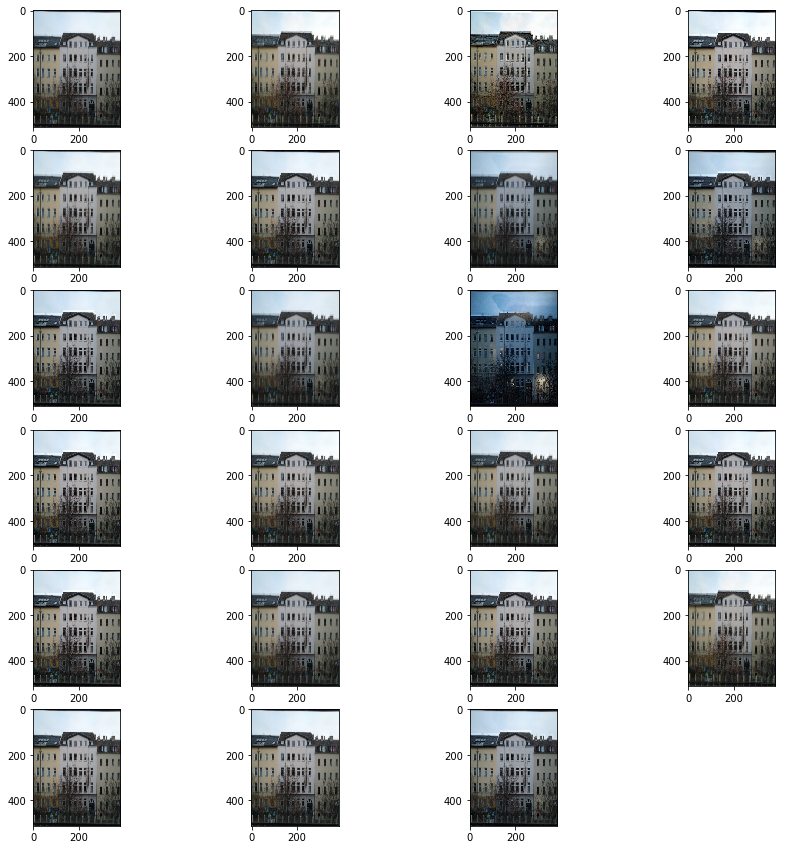

In [9]:
#Plotting the reconstructed versions of all of the photos
fig=plt.figure(figsize=(15, 15))

for i in range(1, 24):
    fig.add_subplot(6, 4, i)
    plt.imshow(reconstructpics[i-1].reshape(512, length, 3))
plt.show()

Downsized image number 1


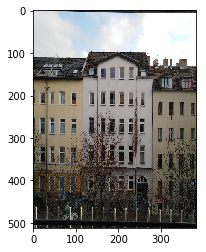

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Reconstructed image number 1


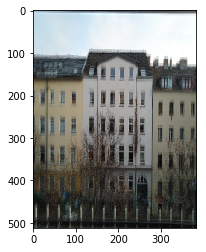

In [10]:
#Printing the 1st image to comapred the reconstructed version with the downsized version
#Also printing the pictures individually made pictures bigger thus it is easier to observe 

print("Downsized image number 1")
plt.imshow(smallpics[1].reshape(512, length, 3))
plt.show()
print("Reconstructed image number 1")
plt.imshow(reconstructpics[1].reshape(512, length, 3))
plt.show()

Since my pictures were almost close to being identical (except the lighting because they were taken from the exact spot at different times of the day), the reconstructions are quite close to the original besides being a bit blurry. Also from the inspection of the 2D location of each photo, we can observe that there is a slight clustering towards the left bottom corner, thus it makes sense that my reconstructions does not vary much from the original picture.

#### Task 5: Pick a random point and plot its reconstruction

Plot of the reconstruction from random point


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


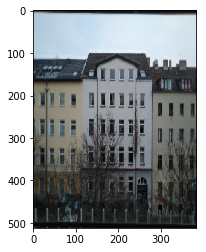

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Plot of the reconstruction from an outlier from the 2D visualization


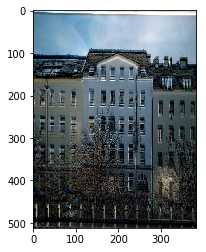

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Plot of the reconstruction from a random point of my choice


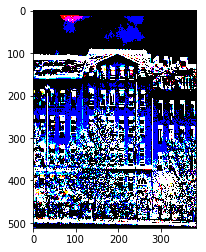

In [11]:
# generate a random point within the observed area of 2D respresentation
x = np.random.uniform(-60, 200)
y = np.random.uniform(-50, 120)

#chosing a random point to recontruct
print("Plot of the reconstruction from random point")
randompic = pca.inverse_transform([x, y])
plt.imshow(randompic.reshape(512, length, 3))
plt.show()

#chosing the point where we don't have much data on based on the 2D visualization
print("Plot of the reconstruction from an outlier from the 2D visualization")
inverse_random_pont = pca.inverse_transform([150, 100])
plt.imshow(inverse_random_pont.reshape(512, length, 3))
plt.show()


#chosing a random point I decided and it is not in the observed area of 2D respresentation plot
print("Plot of the reconstruction from a random point of my choice")
inverse_random_pont = pca.inverse_transform([3500,-250000])
plt.imshow(inverse_random_pont.reshape(512, length, 3))
plt.show()